# Demo of loading a Caffe Deep Model using OpenCV on Predix

by Dattaraj J Rao - Principal Architect - GE Transportation - <a href='mailto:Dattaraj.Rao@ge.com'>Dattaraj.Rao@ge.com</a>

This code is inspired by Adrian Rosebrock's post at: https://www.pyimagesearch.com/2017/08/21/deep-learning-with-opencv

## Imports needed

In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 
import time

# This is needed to display the images.
%matplotlib inline

## Setup the environment - define variables, load image

(530, 1080, 3)


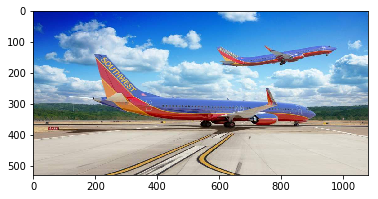

In [14]:
# The image file to use
IMAGE_FILE = "airport.jpg"

# Load file using OpenCV as a numpy array
image = cv2.imread(IMAGE_FILE)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Find height and width of image
print(image.shape)
(h, w) = image.shape[:2]

# resize the image to a 300x300 matrix thats needed by MobileNet
# use mean subtraction and scaling to normalize the image to improve accuracy
blob = cv2.dnn.blobFromImage(image, scalefactor = (1/127.5), size = (300, 300), mean = 127.5)

# show the image
plt.imshow(image)

## Load a pre-trained Caffe model into memory 
### Here we will use a SSD-MobileNet Architecture

In [15]:
# Model parameters
MODEL_PROTO = "Mobilenet-SSD/deploy.prototxt"
MODEL_FILE = "Mobilenet-SSD/MobileNetSSD_deploy.caffemodel"
MODEL_LABELS = "Mobilenet-SSD/labels.txt"

# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(MODEL_PROTO, MODEL_FILE)

# load the class labels from disk
rows = open(MODEL_LABELS).read().strip().split("\n")
classes = [r[r.find(" ") + 1:].split(",")[0] for r in rows]

print("[INFO] Model loaded successfully")

[INFO] loading model...
[INFO] Model loaded successfully


## Make the Prediction using forward pass

In [16]:
# set the blob as input to the network and perform a forward-pass to
# obtain our output classification
net.setInput(blob)
start = time.time()
detections = net.forward()
end = time.time()
print("[INFO] analysis took {:.5} seconds".format(end - start))

[INFO] analysis took 0.16921 seconds


## Decode the predicted values from results array 

In [17]:
# show the results array
print(detections.shape)

# loop over the object detections
for i in np.arange(0, detections.shape[2]):

    # extract the confidence (i.e., probability) associated with the prediction
    confidence = detections[0, 0, i, 2]
    
    # only consider predictions that are above 50% confidence 
    if confidence > 0.5:
        # extract the index of the class label from the `detections`,
        # then compute the (x, y)-coordinates of the bounding box for the object
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # display the prediction
        label = "{}_{:.2f}%".format(classes[idx], confidence * 100)            
        cv2.rectangle(image, (startX, startY), (endX, endY), (255,255,0), 2)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,0), 2)

(1, 1, 2, 7)


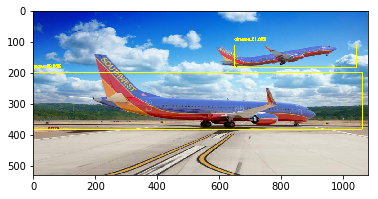

In [10]:
plt.imshow(image)